# **Pls refer this code**

https://www.kaggle.com/code/siddharthkumar25/detect-malicious-url-using-ml/notebook

In [1]:
# Import libraries

import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset 1

data1 = pd.read_csv("malicious_phish.csv")
data1.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
# Show the types of URL in Dataset 1

unique_classes_1 = data1['type'].unique()
print(unique_classes_1)

['phishing' 'benign' 'defacement' 'malware']


In [5]:
# Load dataset 2

data2 = pd.read_csv("phishing_site_urls.csv")
data2.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
# Show the types of URL in Dataset 2

unique_classes_2 = data2['Label'].unique()
print(unique_classes_2)

['bad' 'good']


### **Data preprocessing**

Data cleaning

In [8]:
# Check for null values in Dataset 1
null_values_1 = data1.isnull().sum()

# Print the columns with null values (if any) and their respective counts
print(null_values_1)

url     0
type    0
dtype: int64


In [9]:
# Check for null values in Dataset 2
null_values_2 = data2.isnull().sum()

# Print the columns with null values (if any) and their respective counts
print(null_values_2)

URL      0
Label    0
dtype: int64


In [10]:
# Check for duplicate rows in Dataset 1
duplicate_rows_1 = data1[data1.duplicated()]

# Print the duplicate rows (if any)
print(duplicate_rows_1)

                                                      url        type
876     http://9779.info/%E4%BA%94%E8%B0%B7%E6%9D%82%E...     malware
1361    http://portal.dddgaming.com/docs/rules/15022/c...     malware
1822    http://www.824555.com/app/member/SportOption.p...     malware
1989    http://chinacxyy.com/newscodejs.asp?lm2=201&li...     malware
2963    http://www.bruynzeelmultipanel.be/index.php?op...  defacement
...                                                   ...         ...
535215       http://www.habbocreditosparati.blogspot.com/    phishing
535217  http://mundovirtualhabbo.blogspot.com/2009_01_...    phishing
535218  http://aijcs.blogspot.com/2005/03/colourful-li...    phishing
590597                             bin/webscr?cmd=_login-      benign
600368  'www.allegropl.xaa.pl/enter_login.html?session...      benign

[10066 rows x 2 columns]


In [11]:
# Remove duplicate rows from Dataset 1
data1 = data1.drop_duplicates()

# Verify that duplicates are removed by checking the shape of the DataFrame
print(data1.shape)

(641125, 2)


In [12]:
# Check for duplicate rows in Dataset 2
duplicate_rows_2 = data2[data2.duplicated()]

# Print the duplicate rows (if any)
print(duplicate_rows_2)

                                                      URL Label
35413                              bin/webscr?cmd=_login-   bad
45184   'www.allegropl.xaa.pl/enter_login.html?session...   bad
96132                       stormpages.com/script/PHP.txt   bad
96449          penwithian.co.uk/hyperventilate/sporran.js   bad
96480                            ukonline.hc0.me/Host.exe   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[42150 rows x 2 columns]


In [13]:
# Remove duplicate rows from Dataset 2
data2 = data2.drop_duplicates()

# Verify that duplicates are removed by checking the shape of the DataFrame
print(data2.shape)

(507196, 2)


Determining Imbalance data

In [14]:
# Check the distribution of classes in the "type" column for Dataset 1
class_distribution_1 = data1['type'].value_counts()

# Print the class distribution
print(class_distribution_1)

type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64


In [15]:
# Calculate the class distribution as a percentage for Dataset 1
class_distribution_percentage_1 = (data1['type'].value_counts() / len(data1)) * 100

# Print the class distribution as a percentage
print(class_distribution_percentage_1)

type
benign        66.770131
defacement    14.865744
phishing      14.676077
malware        3.688048
Name: count, dtype: float64


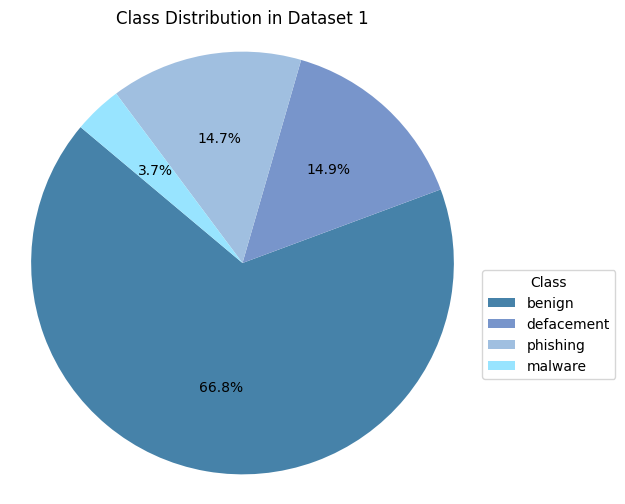

In [16]:
custom_colors = ['#4682A9', '#7895CB', '#A0BFE0' ,'#98E4FF']

# Create a pie chart for Dataset 1
plt.figure(figsize=(6, 6))
plt.pie(class_distribution_1, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Class Distribution in Dataset 1')

# Create a legend
plt.legend(title='Class', labels=class_distribution_1.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.show()

In [17]:
# Check the distribution of classes in the "Label" column for Dataset 2
class_distribution_2 = data2['Label'].value_counts()

# Print the class distribution
print(class_distribution_2)

Label
good    392897
bad     114299
Name: count, dtype: int64


In [18]:
# Calculate the class distribution as a percentage for Dataset 2
class_distribution_percentage_2 = (data2['Label'].value_counts() / len(data2)) * 100

# Print the class distribution as a percentage
print(class_distribution_percentage_2)

Label
good    77.46453
bad     22.53547
Name: count, dtype: float64


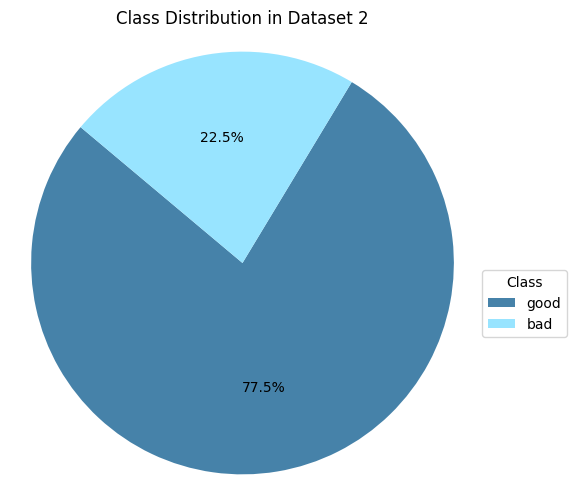

In [19]:
custom_colors = ['#4682A9', '#98E4FF']

# Create a pie chart for Dataset 2
plt.figure(figsize=(6, 6))
plt.pie(class_distribution_2, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Class Distribution in Dataset 2')

# Create a legend
plt.legend(title='Class', labels=class_distribution_2.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.show()

Label Encoding

In [20]:
# Create a mapping of encoded values to class names for Dataset 1
encoded_to_class_1 = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3}

# Map the 'type_encoded' column to class names
data1['type_encoded'] = data1['type'].map(encoded_to_class_1)

# Display the DataFrame with the 'type' column removed
data1 = data1.drop(columns=['type'])

# Rename the 'type_encoded' column to 'type'
data1.rename(columns={'type_encoded': 'type'}, inplace=True)

# Print the updated Dataset 1
print(data1)

                                                      url  type
0                                        br-icloud.com.br     2
1                     mp3raid.com/music/krizz_kaliko.html     0
2                         bopsecrets.org/rexroth/cr/1.htm     0
3       http://www.garage-pirenne.be/index.php?option=...     1
4       http://adventure-nicaragua.net/index.php?optio...     1
...                                                   ...   ...
651186            xbox360.ign.com/objects/850/850402.html     2
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/     2
651188         www.gamespot.com/xbox360/action/deadspace/     2
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)     2
651190          www.angelfire.com/goth/devilmaycrytonite/     2

[641125 rows x 2 columns]


In [21]:
# Get the counts for each class in the 'type' column in Dataset 1
class_counts_1 = data1['type'].value_counts()

# Print the class counts
print(class_counts_1)

type
0    428080
1     95308
2     94092
3     23645
Name: count, dtype: int64


In [22]:
data1.head()

,url,type
0,br-icloud.com.br,2
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1


In [23]:
# Create a mapping of encoded values to class names for Dataset 2
encoded_to_class_2 = {'good': 0, 'bad': 1}

# Map the 'type_encoded' column to class names
data2['type_encoded'] = data2['Label'].map(encoded_to_class_2)

# Display the DataFrame with the 'Label' column removed
data2 = data2.drop(columns=['Label'])

# Rename the 'type_encoded' column to 'Label'
data2.rename(columns={'type_encoded': 'Label'}, inplace=True)

# Print the updated Dataset 2
print(data2)

                                                      URL  Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1
3       mail.printakid.com/www.online.americanexpress....      1
4       thewhiskeydregs.com/wp-content/themes/widescre...      1
...                                                   ...    ...
516466                                    23.227.196.215/      1
516467                                 apple-checker.org/      1
516468                                  apple-iclods.org/      1
516469                                 apple-uptoday.org/      1
516470                                  apple-search.info      1

[507196 rows x 2 columns]


In [24]:
# Get the counts for each class in the 'Label' column in Dataset 2
class_counts_2 = data2['Label'].value_counts()

# Print the class counts
print(class_counts_2)

Label
0    392897
1    114299
Name: count, dtype: int64


In [25]:
data2.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1


### Feature Extraction


### 1. Length Feature:

In [26]:
from urllib.parse import urlparse
import tldextract
from tld import get_tld
import os.path

In [27]:
# Length of URL
data1['url_length'] = data1['url'].apply(lambda i: len(str(i)))
data2['url_length'] = data2['URL'].apply(lambda i: len(str(i)))

In [28]:
# Hostname Length
data1['hostname'] = data1['url'].apply(lambda url: tldextract.extract(url).domain)
data1['hostname_length'] = data1['hostname'].apply(len)

data2['hostname'] = data2['URL'].apply(lambda url: tldextract.extract(url).domain)
data2['hostname_length'] = data2['hostname'].apply(len)

In [29]:
# Path Length
data1['path_length'] = data1['url'].apply(lambda i: len(urlparse(i).path))
data2['path_length'] = data2['URL'].apply(lambda i: len(urlparse(i).path))

In [30]:
# First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data1['fd_length'] = data1['url'].apply(lambda i: fd_length(i))
data2['fd_length'] = data2['URL'].apply(lambda i: fd_length(i))

In [31]:
# Length of Top Level Domain
data1['tld'] = data1['url'].apply(lambda i: get_tld(i,fail_silently=True))
data2['tld'] = data2['URL'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

data1['tld_length'] = data1['tld'].apply(lambda i: tld_length(i))
data2['tld_length'] = data2['tld'].apply(lambda i: tld_length(i))

In [32]:
# Dataset after extracting length features - only want length features, so remove "tld" and "hostname"
data1 = data1.drop("tld", axis=1)
data1 = data1.drop("hostname", axis=1)
data2 = data2.drop("tld", axis=1)
data2 = data2.drop("hostname", axis=1)

In [33]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length
0,br-icloud.com.br,2,16,9,16,0,-1
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3


In [34]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1


### 2. Count Features:

In [35]:
# Count -

data1['count-'] = data1['url'].apply(lambda i: i.count('-'))
data2['count-'] = data2['URL'].apply(lambda i: i.count('-'))

In [36]:
# Count @

data1['count@'] = data1['url'].apply(lambda i: i.count('@'))
data2['count@'] = data2['URL'].apply(lambda i: i.count('@'))

In [37]:
# Count ?

data1['count?'] = data1['url'].apply(lambda i: i.count('?'))
data2['count?'] = data2['URL'].apply(lambda i: i.count('?'))

In [38]:
# Count %

data1['count%'] = data1['url'].apply(lambda i: i.count('%'))
data2['count%'] = data2['URL'].apply(lambda i: i.count('%'))

In [39]:
# Count .

data1['count.'] = data1['url'].apply(lambda i: i.count('.'))
data2['count.'] = data2['URL'].apply(lambda i: i.count('.'))

In [40]:
# Count =

data1['count='] = data1['url'].apply(lambda i: i.count('='))
data2['count='] = data2['URL'].apply(lambda i: i.count('='))

In [41]:
# Count http

data1['count-http'] = data1['url'].apply(lambda i : i.count('http'))
data2['count-http'] = data2['URL'].apply(lambda i : i.count('http'))

In [42]:
# Count https

data1['count-https'] = data1['url'].apply(lambda i : i.count('https'))
data2['count-https'] = data2['URL'].apply(lambda i : i.count('https'))

In [43]:
# Count www

data1['count-www'] = data1['url'].apply(lambda i: i.count('www'))
data2['count-www'] = data2['URL'].apply(lambda i: i.count('www'))

In [44]:
# Count digits

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data1['count-digits']= data1['url'].apply(lambda i: digit_count(i))
data2['count-digits']= data2['URL'].apply(lambda i: digit_count(i))

In [45]:
# Count letters

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data1['count-letters']= data1['url'].apply(lambda i: letter_count(i))
data2['count-letters']= data2['URL'].apply(lambda i: letter_count(i))

In [46]:
# Count number of directories

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data1['count_dir'] = data1['url'].apply(lambda i: no_of_dir(i))
data2['count_dir'] = data2['URL'].apply(lambda i: no_of_dir(i))

In [47]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,br-icloud.com.br,2,16,9,16,0,-1,1,0,0,0,2,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1,0,0,0,0,2,0,0,0,0,1,29,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1,0,0,0,0,2,0,0,0,0,1,25,3
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2,1,0,1,0,3,4,1,0,1,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3,1,0,1,0,2,3,1,0,0,22,199,1


In [48]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1,4,0,1,0,6,4,0,0,0,58,135,8
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1,2,0,0,0,5,2,0,0,1,1,65,4
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1,1,0,0,0,7,0,0,0,0,47,111,11
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1,0,0,0,0,6,0,0,0,1,0,52,2
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1,1,0,1,0,1,0,0,0,0,21,82,7


### 3. Binary Features:

In [49]:
# Use of IP or not in domain -> attackers might include ip address in the URL

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group(), got ip address
        return -1
    else:
        # print 'No matching pattern found', no ip address found
        return 1

data1['use_of_ip'] = data1['url'].apply(lambda i: having_ip_address(i))
data2['use_of_ip'] = data2['URL'].apply(lambda i: having_ip_address(i))

In [50]:
# Check whether got shortening service

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1

data1['short_url'] = data1['url'].apply(lambda i: shortening_service(i))
data2['short_url'] = data2['URL'].apply(lambda i: shortening_service(i))

In [51]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,br-icloud.com.br,2,16,9,16,0,-1,1,0,0,...,2,0,0,0,0,0,13,0,1,1
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1,0,0,0,...,2,0,0,0,0,1,29,2,1,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1,0,0,0,...,2,0,0,0,0,1,25,3,1,1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2,1,0,1,...,3,4,1,0,1,7,63,1,1,1
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3,1,0,1,...,2,3,1,0,0,22,199,1,1,1


In [52]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1,4,0,1,...,6,4,0,0,0,58,135,8,1,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1,2,0,0,...,5,2,0,0,1,1,65,4,1,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1,1,0,0,...,7,0,0,0,0,47,111,11,1,1
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1,0,0,0,...,6,0,0,0,1,0,52,2,1,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1,1,0,1,...,1,0,0,0,0,21,82,7,1,1


### **Model Development**

Standardization

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import time

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [54]:
data1 = data1.drop(columns=["url"])
data2 = data2.drop(columns=["URL"])

In [55]:
# Dataset 1

# Select the columns to be scaled (excluding "url" and "type")
columns_to_scale = data1.columns.difference(['url', 'type'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data1[columns_to_scale] = scaler.fit_transform(data1[columns_to_scale])

In [167]:
data1.head()

,type,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,2,-0.974781,-0.183276,-0.840894,-0.770733,-0.545780,-0.188076,-0.04115,-0.503155,-0.095644,-0.130042,-0.396726,-0.612982,-0.159821,-0.481887,-0.461891,-1.013995,-1.474576,0.10726,0.255943
1,0,-0.551566,-0.596480,-0.203751,-0.318848,-0.545780,-0.523114,-0.04115,-0.503155,-0.095644,-0.130042,-0.396726,-0.612982,-0.159821,-0.481887,-0.375909,-0.509818,-0.198064,0.10726,0.255943
2,0,-0.640664,0.023326,-0.337887,-0.138093,-0.545780,-0.523114,-0.04115,-0.503155,-0.095644,-0.130042,-0.396726,-0.612982,-0.159821,-0.481887,-0.375909,-0.635862,0.440193,0.10726,0.255943
3,1,0.628982,0.849733,-1.042098,0.042661,0.996231,-0.188076,-0.04115,1.769566,-0.095644,0.540450,2.285500,1.532835,-0.159821,2.009364,0.139985,0.561558,-0.836320,0.10726,0.255943
4,1,3.903331,1.882742,-1.042098,0.042661,1.510234,-0.188076,-0.04115,1.769566,-0.095644,-0.130042,1.614944,1.532835,-0.159821,-0.481887,1.429718,4.847061,-0.836320,0.10726,0.255943


In [168]:
# Dataset 2

# Select the columns to be scaled (excluding "URL" and "Label")
columns_to_scale = data2.columns.difference(['URL', 'Label'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])

In [169]:
data2.head()

,Label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,1,4.050126,-0.777214,3.290650,2.591697,-0.014434,1.124892,-0.05635,1.779505,-0.085032,2.586987,3.972404,-0.07591,-0.041328,-0.332842,4.712076,3.153571,3.671028,0.073088,0.269793
1,1,0.689277,-0.560624,1.347850,0.361697,-0.014434,0.323104,-0.05635,-0.349737,-0.085032,1.930673,1.837141,-0.07591,-0.041328,2.836942,-0.331381,0.838336,1.032494,0.073088,0.269793
2,1,2.929843,0.522329,4.866884,6.566916,-0.014434,-0.077790,-0.05635,-0.349737,-0.085032,3.243301,-0.298123,-0.07591,-0.041328,-0.332842,3.738777,2.359776,5.649929,0.073088,0.269793
3,1,0.199153,-0.127443,0.578061,2.106915,-0.014434,-0.478684,-0.05635,-0.349737,-0.085032,2.586987,-0.298123,-0.07591,-0.041328,2.836942,-0.419863,0.408364,-0.286774,0.073088,0.269793
4,1,1.506150,1.172100,1.274537,0.167783,-0.014434,-0.077790,-0.05635,1.779505,-0.085032,-0.694583,-0.298123,-0.07591,-0.041328,-0.332842,1.438253,1.400608,3.011395,0.073088,0.269793


Train-Test Split

In [170]:
# Split to train and test sets

# Split the DataFrame into features (X) and target labels (y)
X_1 = data1.drop(columns=["type"])
y_1 = data1["type"]

# Split the DataFrame into features (X) and target labels (y)
X_2 = data2.drop(columns=["Label"])
y_2 = data2["Label"]

x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.3, random_state=39)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.3, random_state=39)

In [171]:
# Dataset 1

print(f"X_train Shape : {x_train_1.shape}")
print(f"Y_train Shape : {y_train_1.shape}")
print(f"X_test  Shape : {x_test_1.shape}")
print(f"Y_test  Shape : {y_test_1.shape}")

X_train Shape : (448787, 19)
Y_train Shape : (448787,)
X_test  Shape : (192338, 19)
Y_test  Shape : (192338,)


In [172]:
# Dataset 2

print(f"X_train Shape : {x_train_2.shape}")
print(f"Y_train Shape : {y_train_2.shape}")
print(f"X_test  Shape : {x_test_2.shape}")
print(f"Y_test  Shape : {y_test_2.shape}")

X_train Shape : (355037, 19)
Y_train Shape : (355037,)
X_test  Shape : (152159, 19)
Y_test  Shape : (152159,)


In [173]:
# Types of classifier

models = [
    RandomForestClassifier,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    xgb.XGBClassifier,
    lgb.LGBMClassifier,
    LogisticRegression
]

Handling Imbalance Data

In [174]:
from imblearn.over_sampling import SMOTE

# Dataset 1
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
x_train_1, y_train_1 = smote.fit_resample(x_train_1, y_train_1)

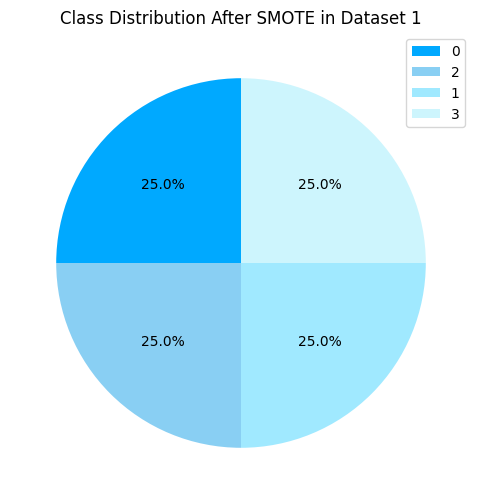

In [175]:
# Calculate the class distribution after SMOTE
after_smote_class_counts_1 = pd.Series(y_train_1).value_counts()

# Labels for the pie chart
labels_1 = after_smote_class_counts_1.index

# Class counts after SMOTE
after_smote_counts_1 = after_smote_class_counts_1.values

# Define a custom color palette with varying shades of blue
custom_colors = ['#00A9FF', '#89CFF3', '#A0E9FF', '#CDF5FD']

# Create a pie chart
plt.figure(figsize=(12, 6))

# Pie chart after SMOTE with custom colors
plt.pie(after_smote_counts_1, labels=['' for _ in labels_1], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Class Distribution After SMOTE in Dataset 1')

# Create a legend for color and label
plt.legend(labels=labels_1, loc="upper right")

plt.show()

In [176]:
# Dataset 2
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
x_train_2, y_train_2 = smote.fit_resample(x_train_2, y_train_2)

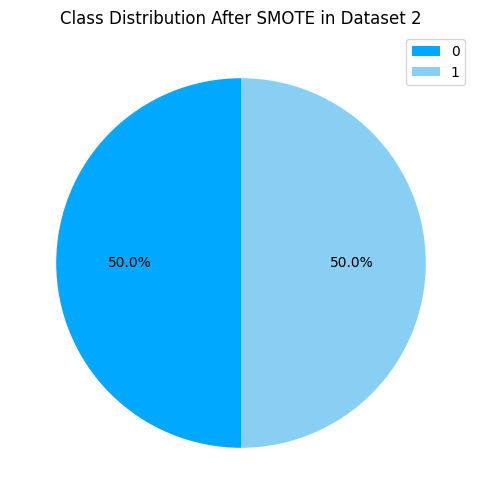

In [177]:
# Calculate the class distribution after SMOTE
after_smote_class_counts_2 = pd.Series(y_train_2).value_counts()

# Labels for the pie chart
labels_2 = after_smote_class_counts_2.index

# Class counts after SMOTE
after_smote_counts_2 = after_smote_class_counts_2.values

# Define a custom color palette with varying shades of blue
custom_colors = ['#00A9FF', '#89CFF3', '#A0E9FF', '#CDF5FD']

# Create a pie chart
plt.figure(figsize=(12, 6))

# Pie chart after SMOTE with custom colors
plt.pie(after_smote_counts_2, labels=['' for _ in labels_2], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Class Distribution After SMOTE in Dataset 2')

# Create a legend for color and label
plt.legend(labels=labels_2, loc="upper right")

plt.show()

Hyperparameter Tuning

In [178]:
# Hyperparameter spaces for hyperopt
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(100, 1001, 100)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'max_depth': hp.choice('max_depth', [None] + list(range(3, 16))),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

space_dt = {
    'max_depth': hp.choice('max_depth', [None, 5, 10, 15, 20, 30, 50]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10, 15, 20]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4, 6, 8])
}

space_lr = {
    'C': hp.loguniform('C', np.log(0.001), np.log(1000)),
    'solver': hp.choice('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']),
    'max_iter': hp.choice('max_iter', range(100, 1001, 100)),
}

space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(5, 21)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree'])
}

space_xgb = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 400, 500]),
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9, 11, 13]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

space_lgb = {
    'num_leaves': hp.choice('num_leaves', [31, 70, 100, 130]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', [100, 300, 500, 700]),
    'max_depth': hp.choice('max_depth', [-1, 15, 25, 35])
}

# Objective function for hyperopt
def objective(space, model_class, x_train, y_train, x_test, y_test):
    model = model_class(**space)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    return -accuracy

def evaluate_model(model, x_test, y_test):
    pred = model.predict(x_test)
    acc = accuracy_score(pred, y_test)
    print('Test Accuracy: {:.4f}%'.format(acc * 100))
    print('Classification Report:')
    print(classification_report(y_test, pred))
    print('Confusion Matrix:')
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.4%')
    plt.show()

### **Model Evaluation**

######-Model => RandomForestClassifier in Dataset 1
100%|██████████| 3/3 [54:25<00:00, 1088.34s/trial, best loss: -0.9445455396229554]
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 600}
Test Accuracy: 94.4452%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    128696
           1       0.91      0.99      0.95     28447
           2       0.85      0.81      0.83     28150
           3       0.92      0.88      0.90      7045

    accuracy                           0.94    192338
   macro avg       0.91      0.91      0.91    192338
weighted avg       0.94      0.94      0.94    192338

Confusion Matrix:


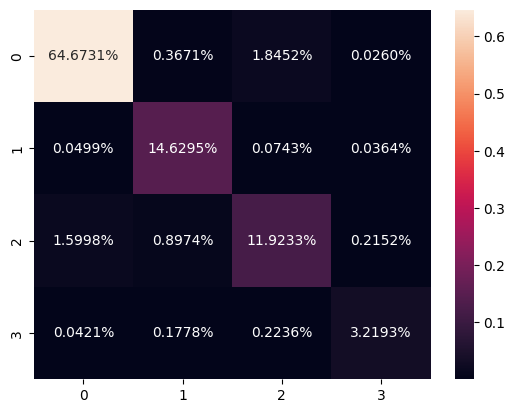

Execution Time for Testing Set: 13.13 seconds


In [ ]:
print('######-Model => RandomForestClassifier in Dataset 1')

# Use hyperopt for RandomForestClassifier
trials_rf = Trials()
best_rf = fmin(fn=lambda space: objective(space, RandomForestClassifier, x_train_1, y_train_1, x_test_1, y_test_1),
               space=space_rf,
               algo=tpe.suggest,
               max_evals=3,
               trials=trials_rf)
best_params_rf = space_eval(space_rf, best_rf)

# Print the best parameters
print("Best Parameters:", best_params_rf)

random_state_value = 39
model_rf = RandomForestClassifier(**best_params_rf, random_state=random_state_value)
model_rf.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate and display results for RandomForestClassifier
evaluate_model(model_rf, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => RandomForestClassifier in Dataset 2
Test Accuracy: 84.8238%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90    117937
           1       0.64      0.75      0.69     34222

    accuracy                           0.85    152159
   macro avg       0.78      0.81      0.79    152159
weighted avg       0.86      0.85      0.85    152159

Confusion Matrix:


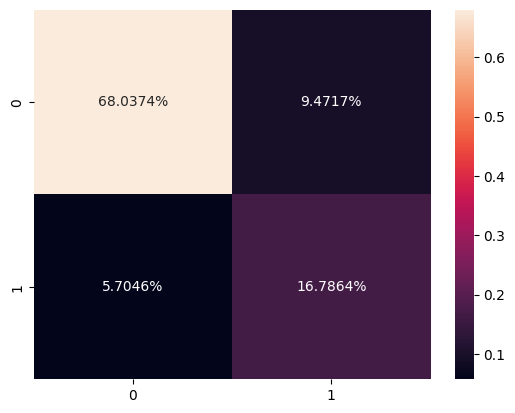

Execution Time for Testing Set: 8.80 seconds


In [ ]:
print('######-Model => RandomForestClassifier in Dataset 2')

random_state_value = 39
model_rf = RandomForestClassifier(**best_params_rf, random_state=random_state_value)
model_rf.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate and display results for RandomForestClassifier
evaluate_model(model_rf, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => KNeighborsClassifier in Dataset 1
100%|██████████| 3/3 [21:45<00:00, 435.08s/trial, best loss: -0.9561449115619378]
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Test Accuracy: 95.6145%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    128696
           1       0.97      0.99      0.98     28447
           2       0.84      0.89      0.86     28150
           3       0.90      0.93      0.92      7045

    accuracy                           0.96    192338
   macro avg       0.93      0.94      0.93    192338
weighted avg       0.96      0.96      0.96    192338

Confusion Matrix:


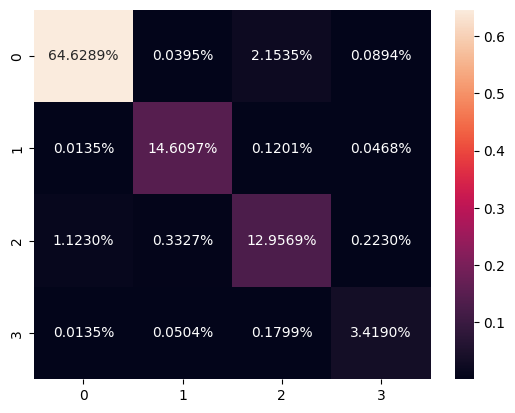

Execution Time for Testing Set: 441.36 seconds


In [ ]:
print('######-Model => KNeighborsClassifier in Dataset 1')

# Use hyperopt for KNeighborsClassifier
trials_knn = Trials()
best_knn = fmin(fn=lambda space: objective(space, KNeighborsClassifier, x_train_1, y_train_1, x_test_1, y_test_1),
                space=space_knn,
                algo=tpe.suggest,
                max_evals=3,
                trials=trials_knn)
best_params_knn = space_eval(space_knn, best_knn)

# Print the best parameters
print("Best Parameters:", best_params_knn)

model_knn = KNeighborsClassifier(**best_params_knn)
model_knn.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate and display results for KNeighborsClassifier
evaluate_model(model_knn, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => KNeighborsClassifier in Dataset 2
Test Accuracy: 90.4475%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    117937
           1       0.77      0.82      0.79     34222

    accuracy                           0.90    152159
   macro avg       0.86      0.88      0.87    152159
weighted avg       0.91      0.90      0.91    152159

Confusion Matrix:


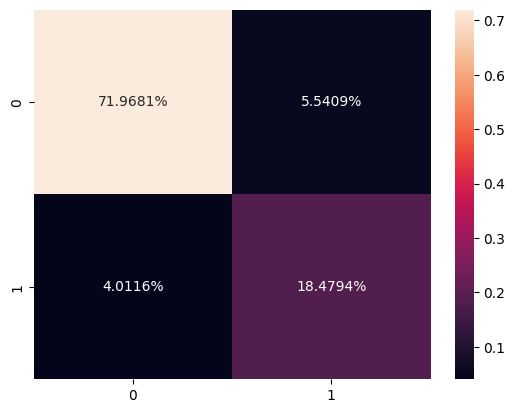

Execution Time for Testing Set: 151.16 seconds


In [ ]:
print('######-Model => KNeighborsClassifier in Dataset 2')

model_knn = KNeighborsClassifier(**best_params_knn)
model_knn.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate and display results for KNeighborsClassifier
evaluate_model(model_knn, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => DecisionTreeClassifier in Dataset 1
100%|██████████| 3/3 [00:50<00:00, 16.81s/trial, best loss: -0.9559837369630546]
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 95.6046%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    128696
           1       0.98      0.98      0.98     28447
           2       0.86      0.86      0.86     28150
           3       0.91      0.92      0.92      7045

    accuracy                           0.96    192338
   macro avg       0.93      0.93      0.93    192338
weighted avg       0.96      0.96      0.96    192338

Confusion Matrix:


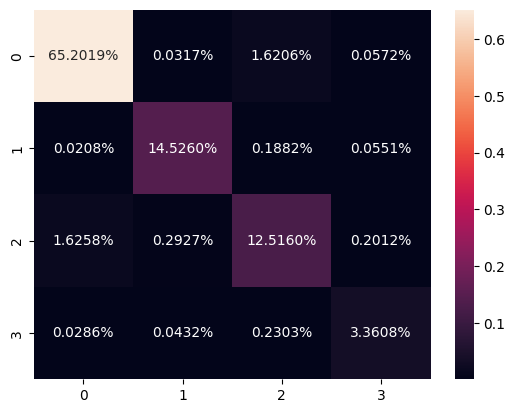

Execution Time for Testing Set: 0.66 seconds


In [ ]:
print('######-Model => DecisionTreeClassifier in Dataset 1')

# Use hyperopt for DecisionTreeClassifier
trials_dt = Trials()
best_dt = fmin(fn=lambda space: objective(space, DecisionTreeClassifier, x_train_1, y_train_1, x_test_1, y_test_1),
               space=space_dt,
               algo=tpe.suggest,
               max_evals=3,
               trials=trials_dt)
best_params_dt = space_eval(space_dt, best_dt)

# Print the best parameters
print("Best Parameters:", best_params_dt)

random_state_value = 39
model_dt = DecisionTreeClassifier(**best_params_dt, random_state = random_state_value)
model_dt.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate on the test set and display results
evaluate_model(model_dt, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => DecisionTreeClassifier in Dataset 2
Test Accuracy: 89.7443%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    117937
           1       0.77      0.77      0.77     34222

    accuracy                           0.90    152159
   macro avg       0.85      0.85      0.85    152159
weighted avg       0.90      0.90      0.90    152159

Confusion Matrix:


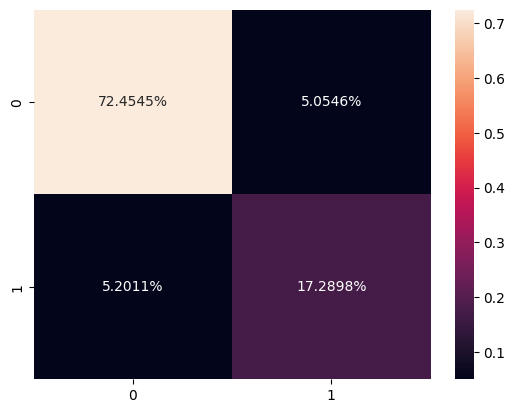

Execution Time for Testing Set: 0.61 seconds


In [ ]:
print('######-Model => DecisionTreeClassifier in Dataset 2')

random_state_value = 39
model_dt = DecisionTreeClassifier(**best_params_dt, random_state = random_state_value)
model_dt.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate on the test set and display results
evaluate_model(model_dt, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => LogisticRegression in Dataset 1
100%|██████████| 3/3 [02:11<00:00, 43.84s/trial, best loss: -0.8239401470328276]
Best Parameters: {'C': 0.021217420162041326, 'max_iter': 500, 'solver': 'liblinear'}
Test Accuracy: 82.3940%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89    128696
           1       0.80      0.95      0.87     28447
           2       0.53      0.56      0.54     28150
           3       0.51      0.86      0.64      7045

    accuracy                           0.82    192338
   macro avg       0.69      0.81      0.74    192338
weighted avg       0.84      0.82      0.83    192338

Confusion Matrix:


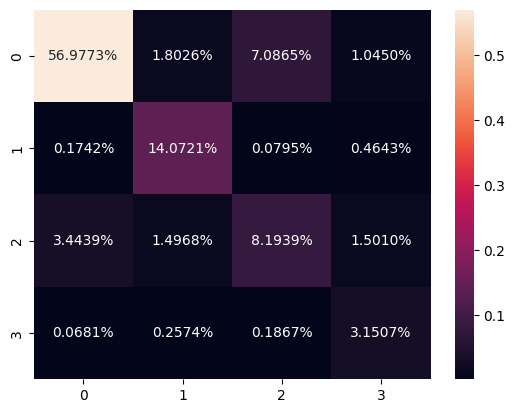

Execution Time for Testing Set: 0.63 seconds


In [ ]:
print('######-Model => LogisticRegression in Dataset 1')

# Use hyperopt for LogisticRegression
trials_lr = Trials()
best_lr = fmin(fn=lambda space: objective(space, LogisticRegression, x_train_1, y_train_1, x_test_1, y_test_1),
               space=space_lr,
               algo=tpe.suggest,
               max_evals=3,
               trials=trials_lr)
best_params_lr = space_eval(space_lr, best_lr)

# Print the best parameters
print("Best Parameters:", best_params_lr)

# Create and fit the Logistic Regression model
random_state_value = 39
model_lr = LogisticRegression(**best_params_lr, random_state=random_state_value)
model_lr.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate and display results for Logistic Regression
evaluate_model(model_lr, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => LogisticRegression in Dataset 2
Test Accuracy: 74.6213%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83    117937
           1       0.45      0.64      0.53     34222

    accuracy                           0.75    152159
   macro avg       0.67      0.71      0.68    152159
weighted avg       0.79      0.75      0.76    152159

Confusion Matrix:


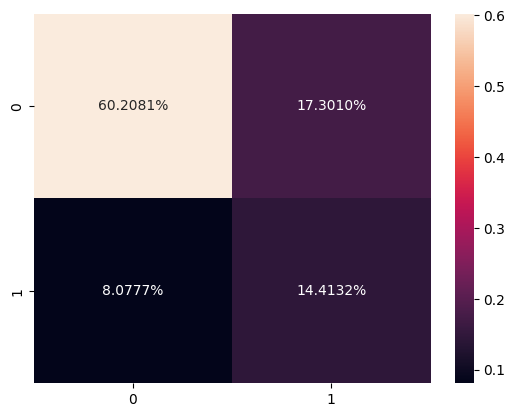

Execution Time for Testing Set: 0.45 seconds


In [ ]:
print('######-Model => LogisticRegression in Dataset 2')

# Create and fit the Logistic Regression model
random_state_value = 39
model_lr = LogisticRegression(**best_params_lr, random_state=random_state_value)
model_lr.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate and display results for Logistic Regression
evaluate_model(model_lr, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => XGBClassifier in Dataset 1
100%|██████████| 3/3 [06:48<00:00, 136.16s/trial, best loss: -0.9674687269286361]
Best Parameters: {'colsample_bytree': 0.7154969125007966, 'learning_rate': 0.03708429517897321, 'max_depth': 13, 'n_estimators': 400, 'subsample': 0.5615996309887612}
Test Accuracy: 96.7479%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    128696
           1       0.98      0.99      0.99     28447
           2       0.90      0.89      0.89     28150
           3       0.97      0.93      0.95      7045

    accuracy                           0.97    192338
   macro avg       0.96      0.95      0.95    192338
weighted avg       0.97      0.97      0.97    192338

Confusion Matrix:


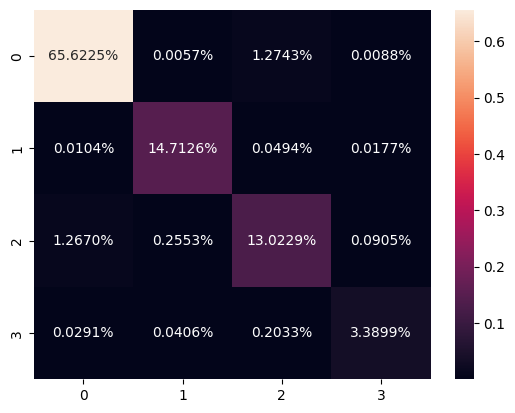

Execution Time for Testing Set: 8.36 seconds


In [ ]:
print('######-Model => XGBClassifier in Dataset 1')

# Use hyperopt for XGBClassifier
trials_xgb = Trials()
best_xgb = fmin(fn=lambda space: objective(space, xgb.XGBClassifier, x_train_1, y_train_1, x_test_1, y_test_1),
                space=space_xgb,
                algo=tpe.suggest,
                max_evals=3,
                trials=trials_xgb)
best_params_xgb = space_eval(space_xgb, best_xgb)

# Print the best parameters
print("Best Parameters:", best_params_xgb)

random_state_value = 39
model_xgb = xgb.XGBClassifier(**best_params_xgb, random_state = random_state_value)
model_xgb.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate and display results for XGBClassifier
evaluate_model(model_xgb, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => XGBClassifier in Dataset 2
Test Accuracy: 91.5431%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95    117937
           1       0.82      0.80      0.81     34222

    accuracy                           0.92    152159
   macro avg       0.88      0.87      0.88    152159
weighted avg       0.91      0.92      0.92    152159

Confusion Matrix:


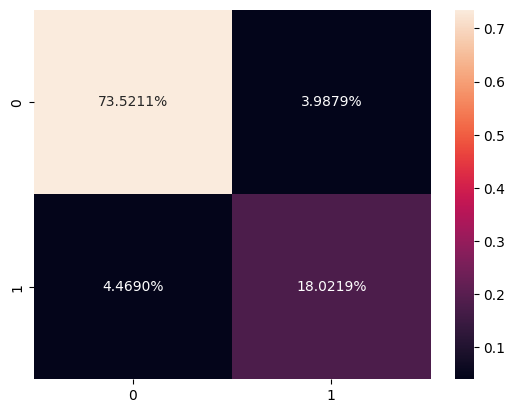

Execution Time for Testing Set: 1.86 seconds


In [ ]:
print('######-Model => XGBClassifier in Dataset 2')

random_state_value = 39
model_xgb = xgb.XGBClassifier(**best_params_xgb, random_state = random_state_value)
model_xgb.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate and display results for XGBClassifier
evaluate_model(model_xgb, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => LGBMClassifier in Dataset 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3250                    
[LightGBM] [Info] Number of data points in the train set: 1197536, number of used features: 19
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055016 seconds.
Y

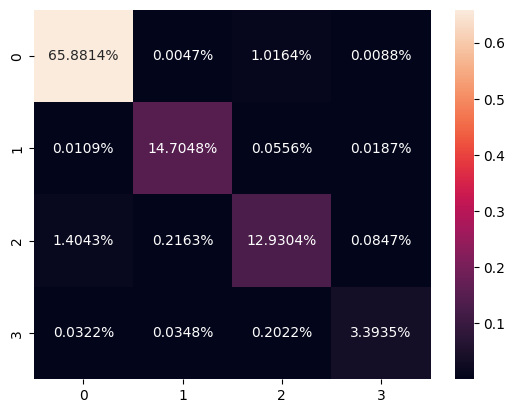

Execution Time for Testing Set: 14.09 seconds


In [ ]:
print('######-Model => LGBMClassifier in Dataset 1')

# Use hyperopt for LGBMClassifier
trials_lgb = Trials()
best_lgb = fmin(fn=lambda space: objective(space, lgb.LGBMClassifier, x_train_1, y_train_1, x_test_1, y_test_1),
                space=space_lgb,
                algo=tpe.suggest,
                max_evals=3,
                trials=trials_lgb)
best_params_lgb = space_eval(space_lgb, best_lgb)

# Print the best parameters
print("Best Parameters:", best_params_lgb)

random_state_value = 39
model_lgb = lgb.LGBMClassifier(**best_params_lgb, random_state=random_state_value)
model_lgb.fit(x_train_1, y_train_1)

# Start timing
start_time = time.time()

# Evaluate and display results for LGBMClassifier
evaluate_model(model_lgb, x_test_1, y_test_1)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

######-Model => LGBMClassifier in Dataset 2
[LightGBM] [Info] Number of positive: 274960, number of negative: 274960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3134
[LightGBM] [Info] Number of data points in the train set: 549920, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Accuracy: 91.7672%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    117937
           1       0.84      0.78      0.81     34222

    accuracy                           0.92    152159
   macro avg       0.89      0.87      0.88    152159
weighted avg       0.92      0.92      0.92    152159

Confusion Matrix:


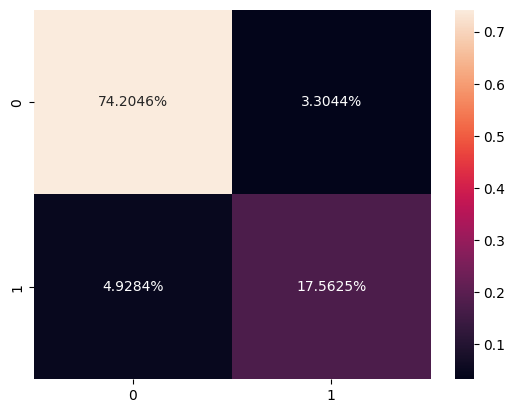

Execution Time for Testing Set: 2.19 seconds


In [ ]:
print('######-Model => LGBMClassifier in Dataset 2')

random_state_value = 39
model_lgb = lgb.LGBMClassifier(**best_params_lgb, random_state = random_state_value)

# Fit the model on the entire training set
model_lgb.fit(x_train_2, y_train_2)

# Start timing
start_time = time.time()

# Evaluate and display results for LGBMClassifier
evaluate_model(model_lgb, x_test_2, y_test_2)

# End timing and print execution time
execution_time = time.time() - start_time
print("Execution Time for Testing Set: {:.2f} seconds".format(execution_time))

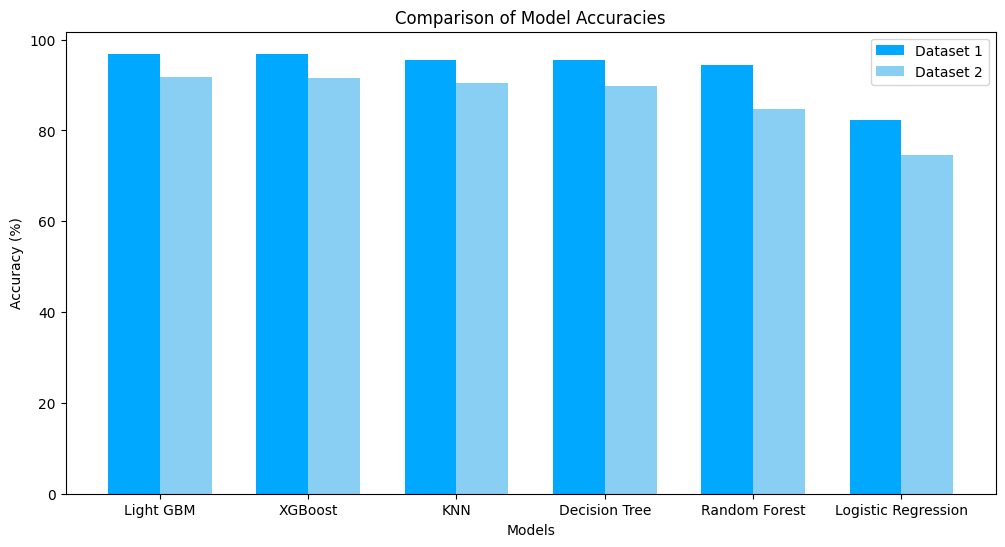

In [ ]:
# Model names
models = ["Random Forest", "Logistic Regression", "KNN", "XGBoost", "Decision Tree", "Light GBM"]

# Accuracy values for each model in Dataset 1 and Dataset 2
accuracy_dataset1 = [94.4452, 82.3940, 95.6145, 96.7479, 95.6046, 96.9101]
accuracy_dataset2 = [84.8238, 74.6213, 90.4475, 91.5431, 89.7443, 91.7672]

# Combine models and accuracies into tuples and sort them by the average accuracy
combined = sorted(zip(models, accuracy_dataset1, accuracy_dataset2), key=lambda x: (x[1]+x[2])/2, reverse=True)

# Unzip the sorted tuples
sorted_models, sorted_accuracy_dataset1, sorted_accuracy_dataset2 = zip(*combined)

# Setting the positions and width for the bars
pos = np.arange(len(sorted_models))
bar_width = 0.35

# Plotting the bars
plt.figure(figsize=(12, 6))

# Creating bars for Dataset 1
plt.bar(pos, sorted_accuracy_dataset1, bar_width, color='#00A9FF', label='Dataset 1')

# Creating bars for Dataset 2
plt.bar(pos + bar_width, sorted_accuracy_dataset2, bar_width, color='#89CFF3', label='Dataset 2')

# Adding the model names to the x-axis
plt.xticks(pos + bar_width / 2, sorted_models)

# Adding axis labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

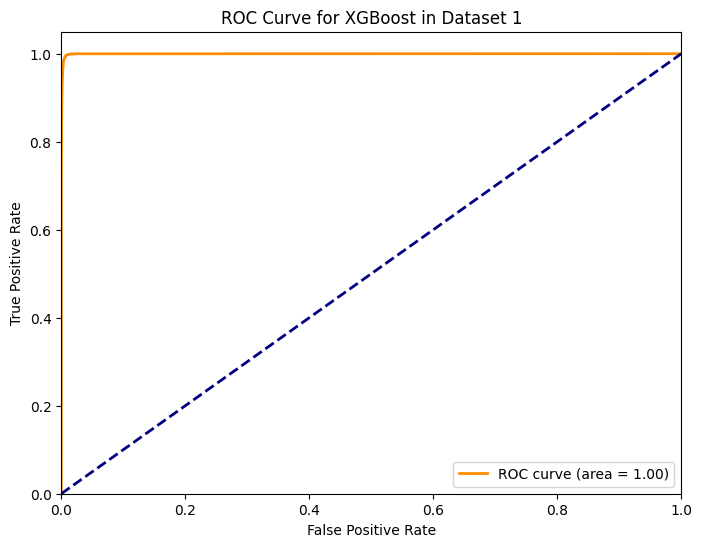

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(x_train_1, y_train_1)

# y_test_1 is multiclass, need to binarize
y_test_binarized = label_binarize(y_test_1, classes=[0, 1, 2, 3])[:, 1]

# Predict probabilities for the positive class
y_scores_1 = xgboost_classifier.predict_proba(x_test_1)[:, 1]

# Use y_test_binarized for ROC curve calculation
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_scores_1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost in Dataset 1')
plt.legend(loc='lower right')

# Display the ROC curve
plt.show()

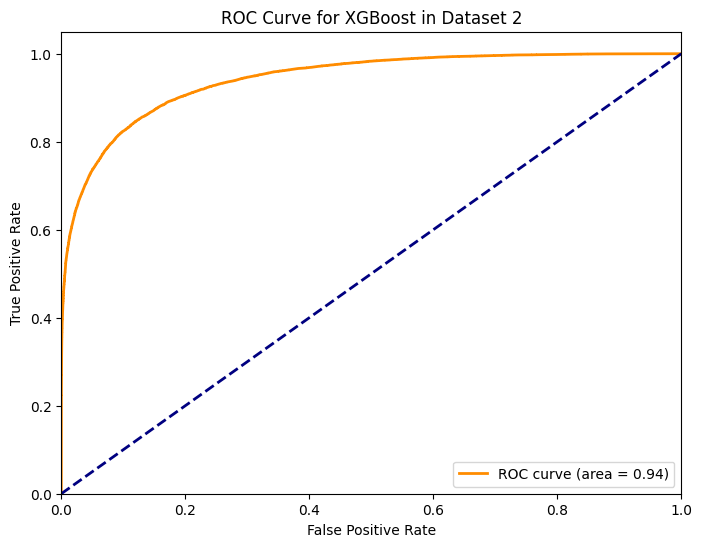

In [ ]:
# Initialize and train the XGBoost model
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(x_train_2, y_train_2)

# y_test_2 is multiclass, need to binarize
y_test_binarized = label_binarize(y_test_2, classes=[0, 1, 2, 3])[:, 1]

# Predict probabilities for the positive class
y_scores_2 = xgboost_classifier.predict_proba(x_test_2)[:, 1]

# Use y_test_binarized for ROC curve calculation
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_scores_2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost in Dataset 2')
plt.legend(loc='lower right')

# Display the ROC curve
plt.show()